## 23. Capstone
- Final Capstone - use NLP 
    - and we can combine Deep learning 

The dataset used for this analysis can be found using the following link: https://www.kaggle.com/wendykan/lending-club-loan-data


About the data

These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables.



We will go step by step for building a machine learning algorith for the prediction of loan defaulters based on certain variables present in the dataset. Our main goal is to correctly identifying defaulter's (True positives) so that lending club can decide whether a person is fit for sanctioning a loan or not in the future.



loan_amnt                     amount of money requested by the borrower
funded_amnt                   The total amount committed to that loan at that point in time.
funded_amnt_inv               The total amount committed by investors for that loan at that point in time.

###### showing all rows and columns 
- pd.set_option('display.max_columns', 500)
- pd.set_option('display.max_rows', 500)

#### check code before submission
http://pep8online.com/

In [1]:
### importing all libraries

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
%matplotlib inline 

from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from scipy.stats import yeojohnson

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.naive_bayes import BernoulliNB # Naive Bayes
from sklearn.ensemble import RandomForestClassifier # 
from sklearn.linear_model import LogisticRegression #
from sklearn import ensemble #boosting
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression #
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM



#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from scipy.stats import boxcox

# These two lines let you show all the columns and rows
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [2]:
df_temp = pd.read_csv('loan.csv')

## Load the dataset

In [3]:
# lets look at some data to see how they look
df_temp.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [4]:
df_original = df_temp.copy()

In [5]:
### take a look at the data and see what format they are
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


From the information above, it seems like there are 2260668 rows, 145 columns. That's a lot of data. So lets start filtering some out.

## Detect the problems with the data
* Detect the problems with the data such as missing values and outliers. 
* Are there any features that does not add any value to our target variable which is the "Loan status" 

Text(0, 0.5, 'Data type')

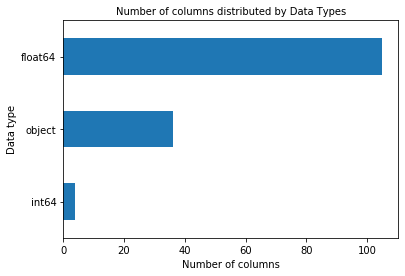

In [6]:
# Lets find out the Number of each type of columns we have so we know what 
# sort of data we are working with
df_temp.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=10)
plt.xlabel('Number of columns')
plt.ylabel('Data type')

In [7]:
## Do we have any missing values?
df_temp.isnull().sum()*100/df_temp.isnull().count()

### other ways to see missing value
### use value_counts()

id                       100.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         98.537777
settlement_date           98.537777
settlement_amount         98.537777
settlement_percentage     98.537777
settlement_term           98.537777
Length: 145, dtype: float64

* Looks like there are a lot of missing values. 
* I am going to use a threshold of 70% to eliminate some of the data. So the columns that have 70% null values, I will drop them. 

In [8]:
df_drop_col_70 = df_temp.dropna(axis=1, thresh=int(0.70*len(df_temp)))

In [9]:
df_drop_col_70.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 87 columns):
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               float64
term                          object
int_rate                      float64
installment                   float64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    float64
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line              object
inq_last_6mths                fl

In [9]:
df_drop_col_70['last_pymnt_d'].value_counts() 

Feb-2019    934725
Jan-2019     52576
Aug-2018     39615
Mar-2018     38269
Oct-2018     37468
             ...  
Jun-2008        20
Mar-2008        18
Jan-2008        11
Feb-2008         8
Dec-2007         2
Name: last_pymnt_d, Length: 135, dtype: int64

(array([1543856.,  216095.,  176667.,  112170.,   77361.,   49955.,
          34551.,   25152.,   16719.,    8142.]),
 array([    0.,  4000.,  8000., 12000., 16000., 20000., 24000., 28000.,
        32000., 36000., 40000.]),
 <a list of 10 Patch objects>)

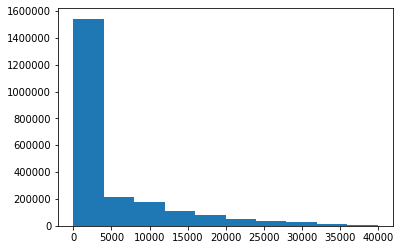

In [10]:
plt.hist(df_drop_col_70['out_prncp'])

In [13]:
### add this feature to the feature

* That brought the columns down to 87 columns. 
* Now lets look at the data a bit carefully and see if there are other columns that are not
needed for our purpose. Again our goal is to predict who will default on their load and 
right now I am trying to find the features that can help predict that.

In [11]:
df_drop_col_70.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Feb-2019,0.0,1,Individual,0.0,0.0,16901.0,42000.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Feb-2019,0.0,1,Individual,0.0,1208.0,321915.0,50800.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,4.0,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Feb-2019,0.0,1,Individual,0.0,0.0,110299.0,24100.0,4.0,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,14.0,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0,Feb-2019,146.51,Feb-2019,0.0,1,Individual,0.0,686.0,305049.0,7000.0,5.0,30505.0,1239.0,75.2,0.0,0.0,62.0,154.0,64.0,5.0,3.0,64.0,5.0,0.0,1.0,2.0,1.0,2.0,7.0,2.0,3.0,2.0,10.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,0.0,0.0,Feb-2019,731.78,Feb-2019,0.0,1,Individual,0.0,0.0,116007.0,23100.0,9.0,9667.0,8471.0,8.9,0.0,0.0,53.0,216.0,2.0,2.0,2.0,2.0,13.0,0.0,2.0,2.0,3.0,8.0,9.0,6.0,15.0,2.0,12.0,0.0,0.0,0.0,5.0,92.3,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


Let us see how many categorical data do the columns having 'object' data types contain:

In [12]:
df_drop_col_70.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                         2
grade                        7
sub_grade                   35
emp_title               512694
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
loan_status                  9
pymnt_plan                   2
purpose                     14
title                    63155
zip_code                   956
addr_state                  51
earliest_cr_line           754
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

* sub_grade                   35
* emp_title               512694
* last_pymnt_d               135
* last_credit_pull_d 
* issue_d                    139
* title                    63155
* zip_code                   956
* addr_state                  51
* earliest_cr_line           754
* last_pymnt_d               135
* last_credit_pull_d         140

These will not be very good since they have too many categories


* Looking at the columns, I am going to identify the features that are most likely to put someone at defaulting the loan. I will start with a lot of features and then cut it down.

* Here are the features at first cut - I will takes these features from the dataframe and look deeper into them

['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','purpose','dti','delinq_2yrs','revol_bal', 'total_pymnt', 'acc_now_delinq', 'tot_coll_amt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag', loan_status']

* The other features does is not of much interest to me. It does not seem like they will play a role in predicting the defaulter

In [13]:
### taking certain features and saving it into a new df

df_loan_default_features = df_drop_col_70.filter(['loan_amnt','term','int_rate','installment',
                                             'grade','emp_length','out_prncp',
                                             'home_ownership','annual_inc','verification_status',
                                             'purpose','dti','delinq_2yrs','revol_bal', 
                                             'total_pymnt', 'acc_now_delinq', 'tot_coll_amt', 
                                             'pub_rec_bankruptcies', 'tax_liens', 
                                             'hardship_flag', 'loan_status'])

In [14]:
# Lets kep a copy of this dataframe since this is a bit clean
df_loan_default_features_orig = df_loan_default_features.copy()

In [15]:
####df_loan_default_features = df_loan_default_features_orig.copy()

In [19]:
# Loan_default_features_df.info()

In [95]:
#df_loan_default_features = df_loan_default_features_orig.copy()

Lets look to see how much missing values are there in these few features

In [96]:
df_loan_default_features.isnull().sum()*100/df_loan_default_features.isnull().count()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              6.498389
out_prncp               0.000000
home_ownership          0.000000
annual_inc              0.000177
verification_status     0.000000
purpose                 0.000000
dti                     0.075686
delinq_2yrs             0.001283
revol_bal               0.000000
total_pymnt             0.000000
acc_now_delinq          0.001283
tot_coll_amt            3.108639
pub_rec_bankruptcies    0.060380
tax_liens               0.004645
hardship_flag           0.000000
loan_status             0.000000
dtype: float64

There are some missing values. There is enough data so we can drop the rows that have null values

In [97]:
## dropping the null rows 
df_loan_default_features.dropna(axis=0, inplace=True)

In [98]:
# this should have no missing values
df_loan_default_features.isnull().sum()*100/df_loan_default_features.isnull().count()

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
out_prncp               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
revol_bal               0.0
total_pymnt             0.0
acc_now_delinq          0.0
tot_coll_amt            0.0
pub_rec_bankruptcies    0.0
tax_liens               0.0
hardship_flag           0.0
loan_status             0.0
dtype: float64

In [99]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045433 entries, 0 to 2260667
Data columns (total 21 columns):
loan_amnt               int64
term                    object
int_rate                float64
installment             float64
grade                   object
emp_length              object
out_prncp               float64
home_ownership          object
annual_inc              float64
verification_status     object
purpose                 object
dti                     float64
delinq_2yrs             float64
revol_bal               int64
total_pymnt             float64
acc_now_delinq          float64
tot_coll_amt            float64
pub_rec_bankruptcies    float64
tax_liens               float64
hardship_flag           object
loan_status             object
dtypes: float64(11), int64(2), object(8)
memory usage: 343.3+ MB


At this point we have 2045433 rows rather than  2260668 rows that we started with and 20 columns rather than 145 that we started with.

In [24]:
#df_loan_default_features.describe()
#df_loan_default_features.shape
# df_loan_default_features.type

Let's look at histograms to see how the numberical variables are looking at what their distributions are. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1342bb978>,
      dtype=object)

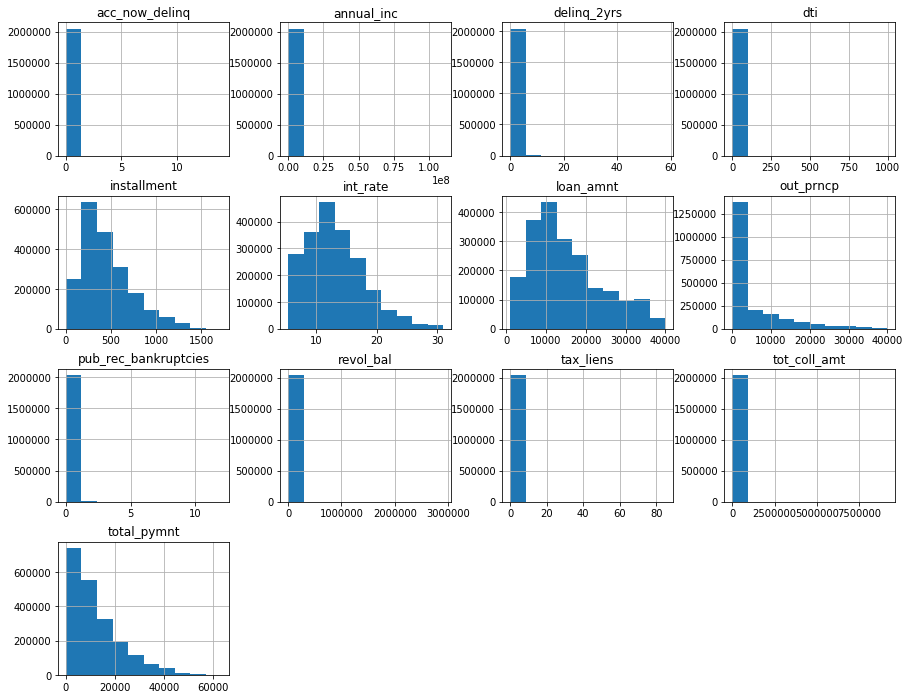

In [100]:
### Lets plot histogram and see the distribution as well as any indication of outliers

#plt.figure(figsize=(15, 12))
df_loan_default_features.hist(figsize=(15, 12))

There are 12 histogram. That means there are 8 columns that are categorical. I want to take a look at the categorical variables and see how they are looking. We can use bar plot, box plot, and violin plots to see what the different categories are.


* loan_amnt               int64
* int_rate                float64
* annual_inc              float64
* installment             float64
* dti                     float64
* delinq_2yrs             float64
* revol_bal               int64
* total_pymnt             float64
* acc_now_delinq          float64
* tot_coll_amt            float64
* pub_rec_bankruptcies    float64
* tax_liens               float64
* out_prncp float64


* term                    object
* grade                   object
* emp_length              object
* home_ownership          object
* verification_status     object
* purpose                 object
* hardship_flag           object

* loan_status             object -> Target variable

Lets look at a few of them a bit carefully - For example, lets see loan_amt, int_rate, annual_inc, dti,
And then we should also look at categorical variable such as emp_length, grade, term

In [101]:
df_loan_default_features['total_pymnt'].value_counts()

0.000000        860
1215.490000     180
1257.300000     162
11258.436374    155
10838.354836    144
               ... 
34081.730033      1
12561.560000      1
2660.530000       1
9987.450000       1
2915.680232       1
Name: total_pymnt, Length: 1462079, dtype: int64

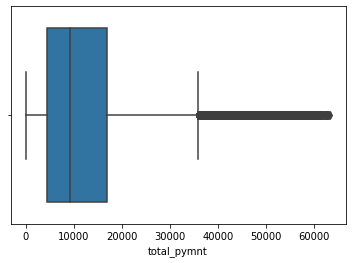

In [102]:
sns.boxplot(df_loan_default_features['total_pymnt'])

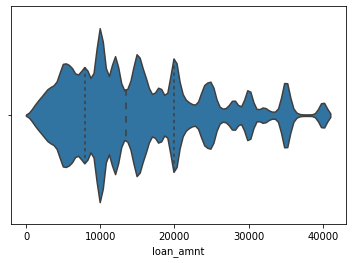

In [103]:
#loan_amnt
#plt.subplots(figsize=(15,6))
sns.violinplot(df_loan_default_features['loan_amnt'],inner="quartile")

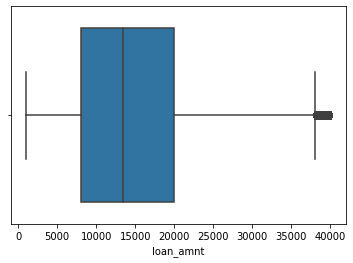

In [104]:
sns.boxplot(df_loan_default_features['loan_amnt'])

In [25]:
#df_loan_default_features['out_prncp'].value_counts()

Most of the loan amount seems to be within 8 - 20K - and there are outliers, therefore, the distribution is not normal. 

It will probably be a good idea to use Boxcox here and remove outliers, bring the distribution to normal, and then analyze the data.

In [105]:
numerical = numeric_columns = df_loan_default_features.select_dtypes(['int64','float64']).columns
for i in numerical:
    if df_loan_default_features[i].min() > 0:
        transformed, lamb = boxcox(df_loan_default_features.loc[df_loan_default_features[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_loan_default_features.loc[df_loan_default_features[i].notnull(), i] = transformed

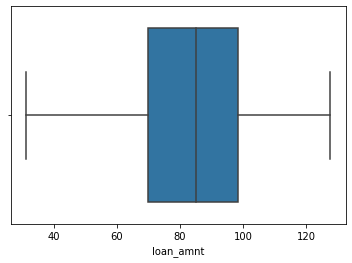

In [106]:
sns.boxplot(df_loan_default_features['loan_amnt'])

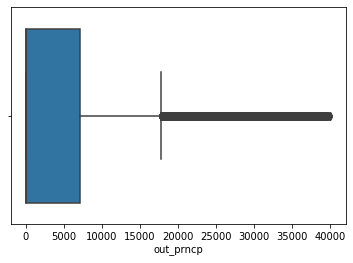

In [107]:

sns.boxplot(df_loan_default_features['out_prncp'])

It seems like the outliers are taken care of and the loan amount is around 65 -100K

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131a6e0f0>,
      dtype=object)

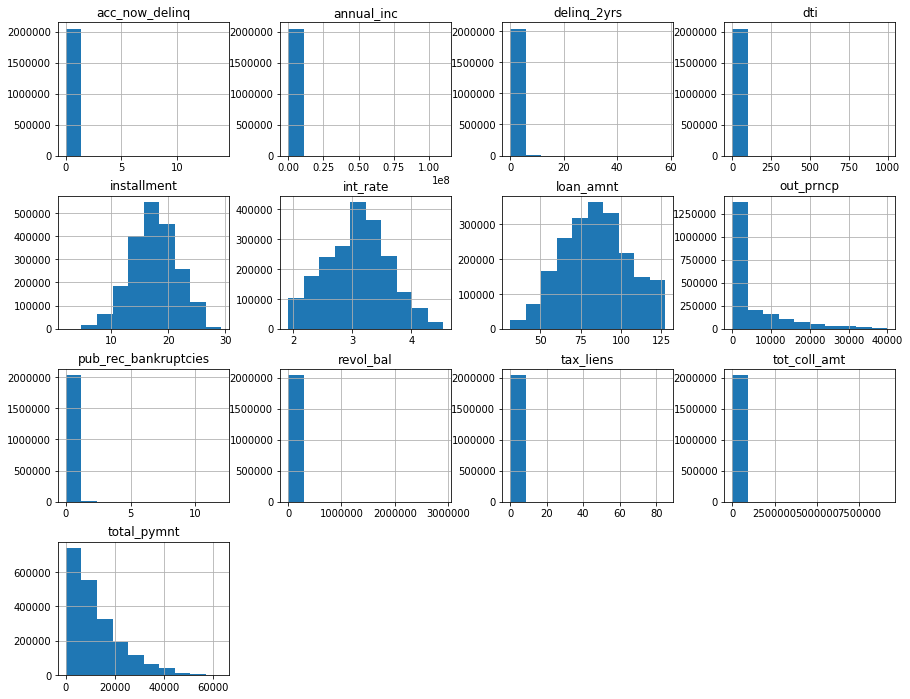

In [108]:
# Lets look at the histograms again after box cox has been applied
df_loan_default_features.hist(figsize=(15, 12))

A lot of the distributions look better than before - e.g., loan_amt, installment, int_rate. - we have established that most of the loan amounts are between 65 - 100. Lets look at the int rate and installment and see what they tell us

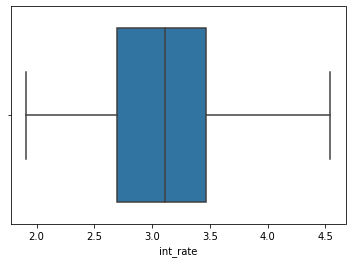

In [109]:
sns.boxplot(df_loan_default_features['int_rate'])

Looks like most interest rates are between 2.7 - 3.5% 

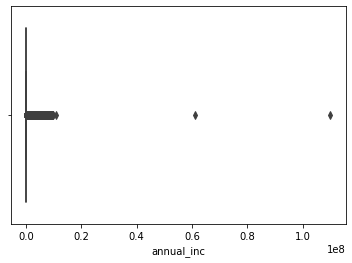

In [110]:
sns.boxplot(df_loan_default_features['annual_inc'])

In [111]:
df_loan_default_features['annual_inc'].describe()

count    2.045433e+06
mean     8.031272e+04
std      1.166170e+05
min      0.000000e+00
25%      4.826800e+04
50%      6.780400e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

Looks like Annual income has outliers which was not taken care of my box cox. The mean is 80312.72 whereas the max is 110000000 - So we should take care of this

In [112]:
annual_inc = df_loan_default_features["annual_inc"].quantile(0.950)
df_loan_default_features = df_loan_default_features[df_loan_default_features["annual_inc"] < annual_inc]

In [37]:
#df_loan_default_features['annual_inc'].describe()

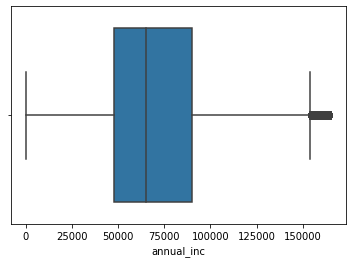

In [113]:
sns.boxplot(df_loan_default_features['annual_inc'])
#sns.violinplot(df_loan_default_features['annual_inc'],inner="quartile")

Looks like most annual incomes are between 50 - 100K

In [39]:
#df_loan_default_features['acc_now_delinq'].value_counts()
#df_loan_default_features['delinq_2yrs'].value_counts()
#df_loan_default_features['dti'].value_counts()
#df_loan_default_features['pub_rec_bankruptcies'].value_counts()
#df_loan_default_features['revol_bal'].value_counts()
#df_loan_default_features['tax_liens'].value_counts()
#df_loan_default_features['tot_coll_amt'].value_counts()

In [40]:
#df_features_temp = df_loan_default_features.copy()

In [41]:
#df_loan_default_features = df_features_temp.copy()

Our target variable is loan status - so lets take a look at that

In [114]:
df_loan_default_features['loan_status'].value_counts()

Fully Paid            886128
Current               799700
Charged Off           223587
Late (31-120 days)     19006
In Grace Period         7854
Late (16-30 days)       3107
Default                   28
Name: loan_status, dtype: int64

The `loan_status` is our target variable. However we are interested in `default`. However there are only 28 defults. so the data is not so balanced here - from the data above, people who are Current, Charged Off, Late (31-120 days), In Grace Period, Late (16-30 days) are all in risk of defaulting. So we can take all of those and merge it under `default`.

In [43]:
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Current']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'In Grace Period']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (16-30 days)']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (31-120 days)']

In [115]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Current']

In [116]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'In Grace Period':'Default'})

In [117]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Late (16-30 days)':'Default'})

In [118]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Late (31-120 days)':'Default'})

In [119]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Charged Off':'Default'})

In [120]:
df_loan_default_features['loan_status'].value_counts()

Fully Paid    886128
Default       253582
Name: loan_status, dtype: int64

In [121]:
### 0 being Fully paid and 1 being Default
df_loan_default_features.loan_status=df_loan_default_features.loan_status.astype('category').cat.codes

In [122]:
df_loan_default_features['loan_status'].value_counts()

1    886128
0    253582
Name: loan_status, dtype: int64

In [123]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139710 entries, 100 to 2260664
Data columns (total 21 columns):
loan_amnt               1139710 non-null float64
term                    1139710 non-null object
int_rate                1139710 non-null float64
installment             1139710 non-null float64
grade                   1139710 non-null object
emp_length              1139710 non-null object
out_prncp               1139710 non-null float64
home_ownership          1139710 non-null object
annual_inc              1139710 non-null float64
verification_status     1139710 non-null object
purpose                 1139710 non-null object
dti                     1139710 non-null float64
delinq_2yrs             1139710 non-null float64
revol_bal               1139710 non-null int64
total_pymnt             1139710 non-null float64
acc_now_delinq          1139710 non-null float64
tot_coll_amt            1139710 non-null float64
pub_rec_bankruptcies    1139710 non-null float64
tax_liens  

In [53]:
#df_loan_default_features.hist(figsize=(15, 12))

<Figure size 2160x1440 with 0 Axes>

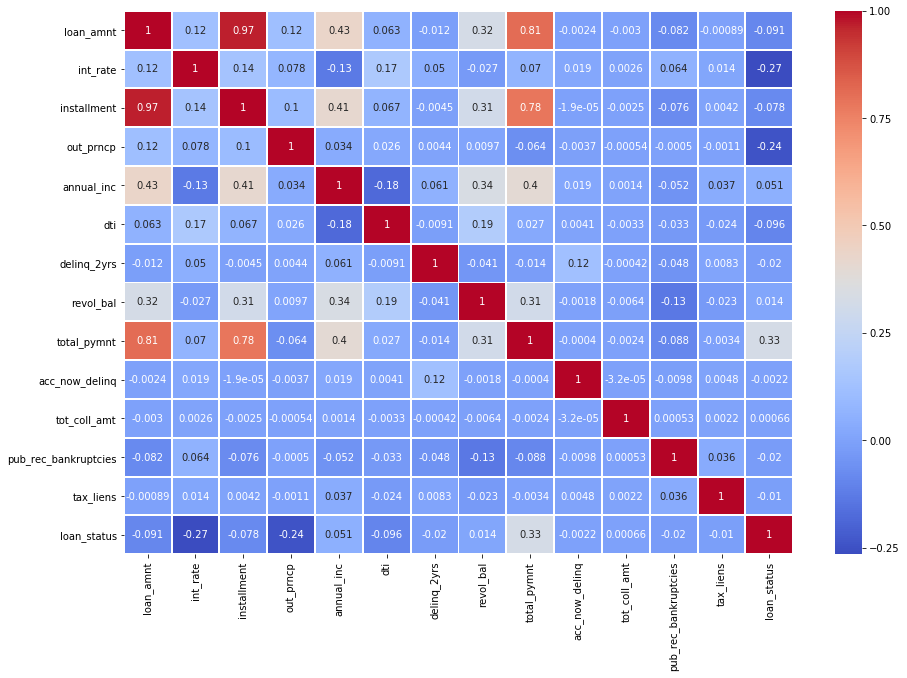

In [124]:
### lets look at the data correlation for only the continuous variables for now

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

I am going to use a cut off of 60% to eliminate features that are highly correlated to each other. and the same amount of 60% to see which features are correlated to the loan status later on

* It seems like total payment and loan amt are highly corrlated to each other - (we might want to elimindate total_payment)

* It seems like total payment and installments are highly correlated to each other - (we might want to eliminate total payment) 
* Intallment and loan amount are highly correlated as well - - this makes sense since a person who takes a large sum of loan would require extra time to repay it back. --- drop installment

In [55]:
## Dropping total_payment
#df_loan_default_features.drop('total_pymnt', axis=1, inplace=True)

In [125]:
## Dropping installment
df_loan_default_features.drop('installment', axis=1, inplace=True)

<Figure size 2160x1440 with 0 Axes>

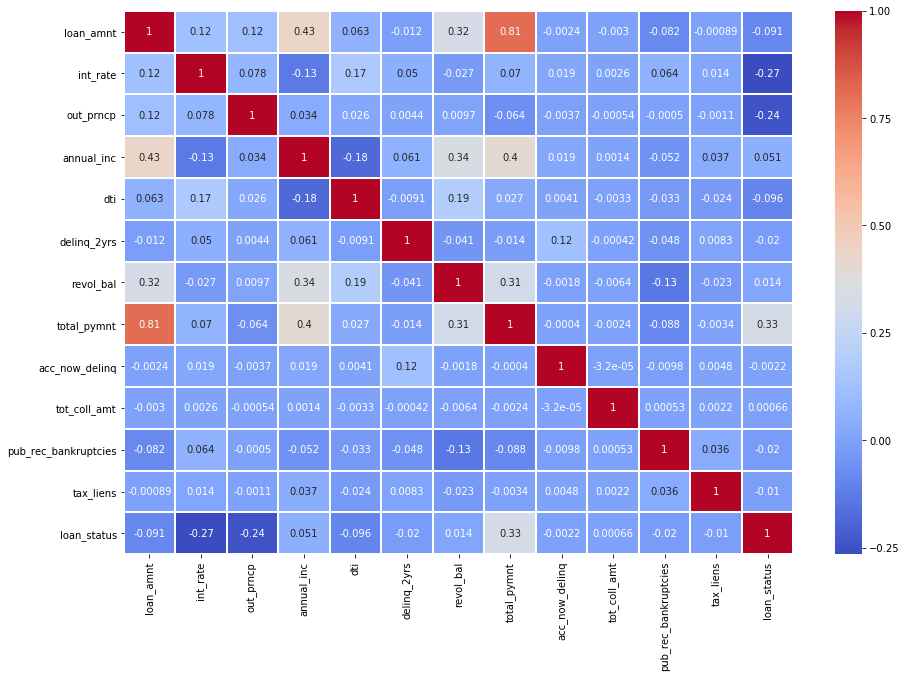

In [126]:
### lets look at the data correlation for only the continuous variables for now

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

In [67]:
#df_loan_default_features.drop('loan_amnt', axis=1, inplace=True)

In [58]:
### Saving a copy of the df so far
#df_loan_default_features_orig2 = df_loan_default_features.copy()

Its time to look at the categorical variables

In [127]:
df_loan_default_features['term'].value_counts()

 36 months    852896
 60 months    286814
Name: term, dtype: int64

In [60]:
### We can also plot it too if we want -

#df_loan_default_features.term.value_counts().plot(kind='bar', figsize=(20, 10))
#plt.title('Term counts')
#plt.xlabel('Term title')
#plt.ylabel('Term counts')

In [128]:
### its only 2 categories so lets change them to numeric
df_loan_default_features.term=df_loan_default_features.term.astype('category').cat.codes

In [62]:
#df_loan_default_features.info()

In [129]:
df_loan_default_features['term'].value_counts()

0    852896
1    286814
Name: term, dtype: int64

In [130]:
df_loan_default_features['grade'].value_counts()

C    332414
B    328856
A    184929
D    175139
E     82048
F     28228
G      8096
Name: grade, dtype: int64

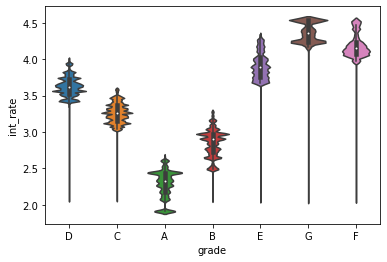

In [131]:
#sns.violinplot(df_loan_default_features['loan_amnt'],inner="quartile")

sns.violinplot(x="grade", y="int_rate", data=df_loan_default_features)

Looks like there maybe a correlation between interest rate and grade - the highter the grade is the higher the interest rate is.

In [73]:
#sns.violinplot(x="grade", y="loan_amnt", data=df_loan_default_features)

In [132]:
### Lets convert Grade - numberic
df_loan_default_features.grade=df_loan_default_features.grade.astype('category').cat.codes

In [133]:
df_loan_default_features['grade'].value_counts()

2    332414
1    328856
0    184929
3    175139
4     82048
5     28228
6      8096
Name: grade, dtype: int64

In [134]:
df_loan_default_features['emp_length'].value_counts()

10+ years    402237
2 years      108833
< 1 year      96585
3 years       96336
1 year        79589
5 years       74447
4 years       71055
6 years       55623
8 years       55215
7 years       53544
9 years       46246
Name: emp_length, dtype: int64

Text(0, 0.5, 'emp_length counts')

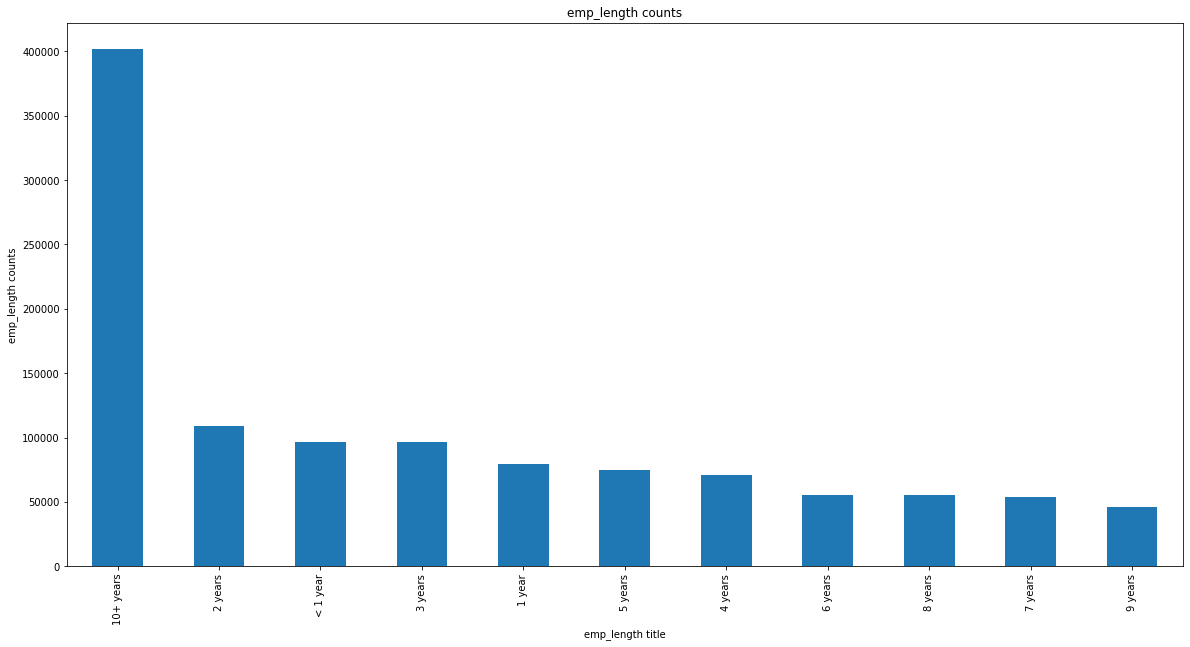

In [135]:
df_loan_default_features.emp_length.value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('emp_length counts')
plt.xlabel('emp_length title')
plt.ylabel('emp_length counts')

Looks like most people who takes loan have job for 10+ years. It might be better to combine them to a little less categories

- 0-4
- 5-9
- 10+


In [71]:
#df_loan_default_features = df_loan_default_features[df_loan_default_features.emp_length != 'Current']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'In Grace Period']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (16-30 days)']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (31-120 days)']

In [72]:
#df_feat_temp = df_loan_default_features.copy()

In [136]:
df_loan_default_features['emp_length'] = df_loan_default_features['emp_length'].replace({'< 1 year':'0-4 years',
                         '1 year':'0-4 years',
                         '2 years':'0-4 years',
                         '3 years':'0-4 years',
                         '4 years':'0-4 years',
                         '5 years':'5-9 years',
                         '6 years':'5-9 years',
                         '7 years':'5-9 years',
                         '8 years':'5-9 years',
                         '9 years':'5-9 years'})

In [137]:
df_loan_default_features['emp_length'].value_counts()

0-4 years    452398
10+ years    402237
5-9 years    285075
Name: emp_length, dtype: int64

Text(0, 0.5, 'emp_length counts')

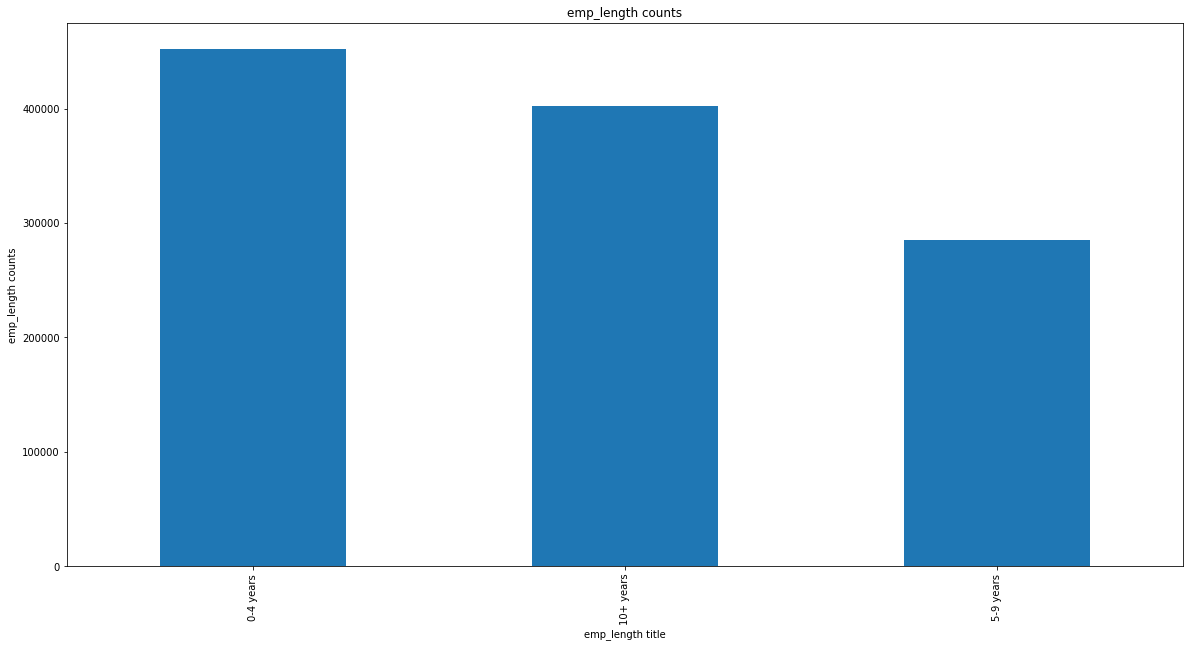

In [138]:
df_loan_default_features.emp_length.value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('emp_length counts')
plt.xlabel('emp_length title')
plt.ylabel('emp_length counts')

In [139]:
### Lets convert emp_length to - numberic
df_loan_default_features.emp_length=df_loan_default_features.emp_length.astype('category').cat.codes

In [140]:
df_loan_default_features['emp_length'].value_counts()

0    452398
1    402237
2    285075
Name: emp_length, dtype: int64

In [141]:
df_loan_default_features['home_ownership'].value_counts()

MORTGAGE    558647
RENT        462758
OWN         117969
ANY            252
NONE            43
OTHER           41
Name: home_ownership, dtype: int64

From the amount of data we have - we could drop any/none/other and just keep it to the 3 categories.

In [142]:
df_feat_temp2 = df_loan_default_features.copy()

In [143]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139710 entries, 100 to 2260664
Data columns (total 20 columns):
loan_amnt               1139710 non-null float64
term                    1139710 non-null int8
int_rate                1139710 non-null float64
grade                   1139710 non-null int8
emp_length              1139710 non-null int8
out_prncp               1139710 non-null float64
home_ownership          1139710 non-null object
annual_inc              1139710 non-null float64
verification_status     1139710 non-null object
purpose                 1139710 non-null object
dti                     1139710 non-null float64
delinq_2yrs             1139710 non-null float64
revol_bal               1139710 non-null int64
total_pymnt             1139710 non-null float64
acc_now_delinq          1139710 non-null float64
tot_coll_amt            1139710 non-null float64
pub_rec_bankruptcies    1139710 non-null float64
tax_liens               1139710 non-null float64
hardship_flag    

In [144]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'ANY']

In [145]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'NONE']
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'OTHER']

In [146]:
df_loan_default_features['home_ownership'].value_counts()

MORTGAGE    558647
RENT        462758
OWN         117969
Name: home_ownership, dtype: int64

In [147]:
df_loan_default_features.home_ownership=df_loan_default_features.home_ownership.astype('category').cat.codes

In [148]:
df_loan_default_features['home_ownership'].value_counts()

0    558647
2    462758
1    117969
Name: home_ownership, dtype: int64

* Emp length

0-4 years    469504
10+ years    418842
5-9 years    295712

0    469504
1    418842
2    295712

* Home owndership

MORTGAGE    588722
RENT        472578
OWN         122410
Name: home_ownership, dtype: int64

0    588722
2    472578
1    122410
Name: home_ownership, dtype: int64

In [149]:
df_loan_default_features['verification_status'].value_counts()

Source Verified    457528
Not Verified       351627
Verified           330219
Name: verification_status, dtype: int64

In [150]:
df_loan_default_features['verification_status'] = df_loan_default_features['verification_status'].replace({'Verified':'Source Verified'})

In [151]:
df_loan_default_features.verification_status=df_loan_default_features.verification_status.astype('category').cat.codes
df_loan_default_features['verification_status'].value_counts()

1    787747
0    351627
Name: verification_status, dtype: int64

This probably means if the borrowers status and income was verified. This feature has some discrepency - It seems like source verified and verified could be the same - its probably dirty data and its giving it 2 different categories for the same things. I am going to drop this column since it does not seem to be a feature that could be useful for determining a loan defaulter.

In [92]:
#df_loan_default_features.drop('verification_status', axis=1, inplace=True)

In [88]:
#df_loan_default_features.info()

In [152]:
df_loan_default_features['purpose'].value_counts()

debt_consolidation    673568
credit_card           252043
home_improvement       69325
other                  63608
major_purchase         23329
medical                12659
car                    11170
small_business         11127
moving                  7750
vacation                7491
house                   5750
wedding                  838
renewable_energy         715
educational                1
Name: purpose, dtype: int64

THe purpose column also does not provide too much info on whether someone will pay loan off or not. and its all over the place - so we should delte that columns too

In [153]:
df_loan_default_features.drop('purpose', axis=1, inplace=True)

In [91]:
#df_loan_default_features.info()

In [154]:
df_loan_default_features['hardship_flag'].value_counts()

N    1138615
Y        759
Name: hardship_flag, dtype: int64

This is a very unbalanced data - Although hardship flag may say something about whether a person will default or not, this data is very scewed - so we will drop this too

In [155]:
df_loan_default_features.drop('hardship_flag', axis=1, inplace=True)

In [94]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183710 entries, 100 to 2260664
Data columns (total 16 columns):
loan_amnt               1183710 non-null float64
term                    1183710 non-null int8
int_rate                1183710 non-null float64
grade                   1183710 non-null int8
emp_length              1183710 non-null int8
out_prncp               1183710 non-null float64
home_ownership          1183710 non-null int8
annual_inc              1183710 non-null float64
dti                     1183710 non-null float64
delinq_2yrs             1183710 non-null float64
revol_bal               1183710 non-null int64
acc_now_delinq          1183710 non-null float64
tot_coll_amt            1183710 non-null float64
pub_rec_bankruptcies    1183710 non-null float64
tax_liens               1183710 non-null float64
loan_status             1183710 non-null int8
dtypes: float64(10), int64(1), int8(5)
memory usage: 114.0 MB


We now have 16 columns - 1183710 entries and data is all numberic. 

In [95]:
#sns.barplot(data=df_loan_default_features)

<Figure size 2160x1440 with 0 Axes>

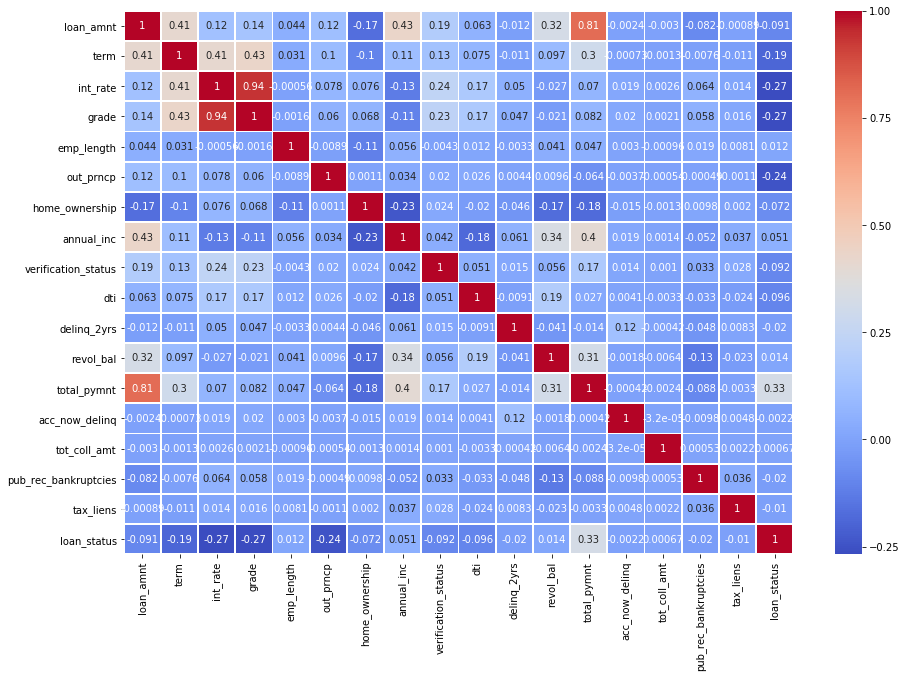

In [156]:
### lets look at the correlation again

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

As we have suspected, grade has a high correlation with interest rate - so we will keep interest rate and remove grade.

In [157]:
df_loan_default_features.drop('grade', axis=1, inplace=True)

In [158]:
temp = df_loan_default_features.copy()

In [159]:
df_loan_default_features.drop('loan_amnt', axis=1, inplace=True)

<Figure size 2160x1440 with 0 Axes>

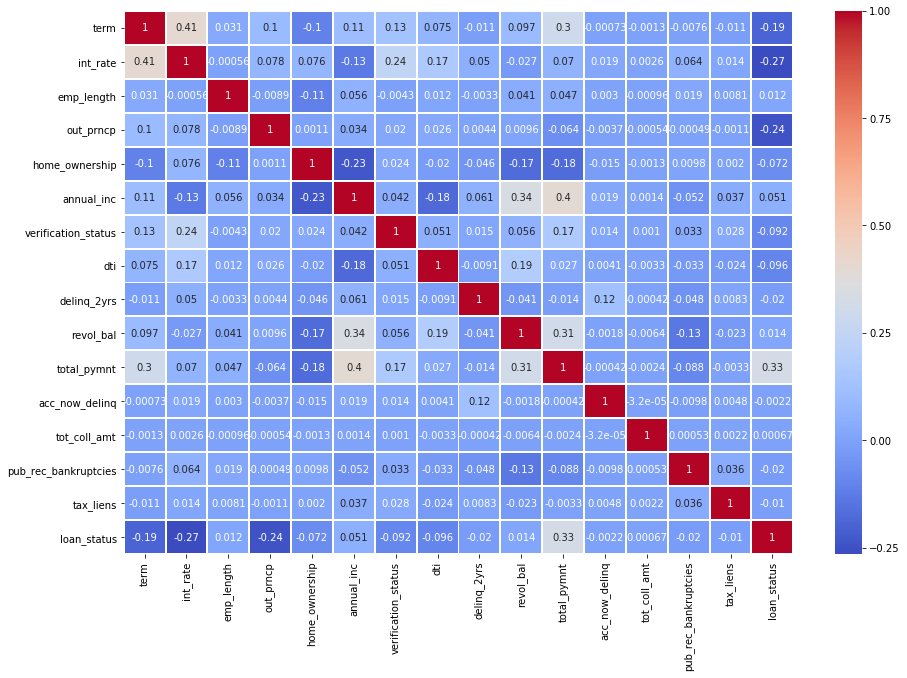

In [160]:
### lets look at the correlation again

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

In [161]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139374 entries, 100 to 2260664
Data columns (total 16 columns):
term                    1139374 non-null int8
int_rate                1139374 non-null float64
emp_length              1139374 non-null int8
out_prncp               1139374 non-null float64
home_ownership          1139374 non-null int8
annual_inc              1139374 non-null float64
verification_status     1139374 non-null int8
dti                     1139374 non-null float64
delinq_2yrs             1139374 non-null float64
revol_bal               1139374 non-null int64
total_pymnt             1139374 non-null float64
acc_now_delinq          1139374 non-null float64
tot_coll_amt            1139374 non-null float64
pub_rec_bankruptcies    1139374 non-null float64
tax_liens               1139374 non-null float64
loan_status             1139374 non-null int8
dtypes: float64(10), int64(1), int8(5)
memory usage: 109.7 MB


So now we have 14 features that we will use to model

In [162]:
### Lets make a copy of our dataframe in case something goes wrong
df_features_final = df_loan_default_features.copy()

## Supervised Machine learning algorithms for prediction

In [163]:
### Lets create our x and y variables
X = df_loan_default_features.copy()
y = df_loan_default_features['loan_status']
X = df_loan_default_features.drop(['loan_status'], axis=1)

In [164]:
### spliting test and train dataset
### Taking 30% of the data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [165]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote_data = SMOTE(random_state=12)
X_train_sm, y_train_sm = smote_data.fit_sample(X_train, y_train)
#X_test_sm, y_test_sm = smote_data.fit_sample(X_train, y_test)

In [104]:
#### SMOTE on training data only

### grid search (will take longer), random search( random forrest, boosting to get best features) 

#### what would be the accuracy of the model is someone was paying the loan
#### Fully Paid    922635
#### Default       261423

922635 /(922635+261423) = .7792 -> 77.92%

### Naive Bayes

In [105]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [106]:
naive_bayes_sm = BernoulliNB()
naive_bayes_sm.fit(X_train_sm, y_train_sm)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [107]:
### Accuracy of the model with training data
#print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, naive_bayes.predict(X_train))))

In [108]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, naive_bayes.predict(X_test))))

accuracy score: 0.8053



In [109]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, naive_bayes_sm.predict(X_test))))

accuracy score: 0.6509



In [110]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, naive_bayes.predict(X_test))))

Confusion Matrix: 
 [[  9319  69152]
 [     4 276638]]



In [111]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, naive_bayes_sm.predict(X_test))))

Confusion Matrix: 
 [[ 36675  41796]
 [ 82162 194480]]



# MAGDA
* 78456 are identified as false negetive - they are identified as default when they should not?
* 42 are identified as default when they should not? False positive
* what does this mean for the model?
    - Bad model
    - 

### Logstic regression

In [112]:
### Create and fit the model
logistic_regression = LogisticRegression(C = 0.0001,random_state=21)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
log_reg_sm = LogisticRegression(C = 0.0001,random_state=21)

log_reg_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, logistic_regression.predict(X_test))))

accuracy score: 0.8052



In [115]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, log_reg_sm.predict(X_test))))

accuracy score: 0.5789



In [116]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, logistic_regression.predict(X_test))))

Confusion Matrix: 
 [[  9306  69165]
 [     1 276641]]



In [117]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, log_reg_sm.predict(X_test))))

Confusion Matrix: 
 [[ 47632  30839]
 [118693 157949]]



In [118]:
#result = cross_val_score(logistic_regression, X_train, y_train, cv=10, scoring='accuracy')
#print("Average Accuracy: \t {0:.4f}".format(np.mean(result)))

# MAGDA
* Did we mistakenly identify 0 default loan? so there are no false negetive?
* did we identify 182875 default loans by mistake when thye should not? 
* does this mean that the model is overfitted?

- the accuracy scores are similar to Naive bayes... given that they are both classification models is that right?

###  Random forrest
* In logistic regression, we saw that the model might have been overfitted - Random forrest tends not to overfit - so lets try that

In [166]:
### Create and fit the model
random_forrest = RandomForestClassifier(n_estimators=40, random_state=21)
random_forrest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [167]:
### Create and fit the model
random_forrest_sm = RandomForestClassifier(n_estimators=40, random_state=21)
random_forrest_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [168]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, random_forrest.predict(X_test))))

accuracy score: 0.8701



In [169]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, random_forrest_sm.predict(X_test))))

accuracy score: 0.8420



In [170]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, random_forrest.predict(X_test))))

Confusion Matrix: 
 [[ 34903  28352]
 [  8650 212939]]



In [171]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, random_forrest_sm.predict(X_test))))

Confusion Matrix: 
 [[ 42373  20882]
 [ 24120 197469]]



In [184]:
# random search tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [185]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
## Now, we instantiate the random search and fit it like any Scikit-Learn model:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
### Create and fit the model
random_forrest_sm_rand = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_forrest_sm_random = RandomizedSearchCV(estimator = random_forrest_sm_rand, 
                                              param_distributions = random_grid, 
                                              n_iter = 10, cv = 3, verbose=2, 
                                              random_state=42, n_jobs = -1)
# Fit the random search model
random_forrest_sm_random.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [189]:
#We can view the best parameters from fitting the random search:
random_forrest_sm_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [190]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, random_forrest_sm_random.predict(X_test))))

accuracy score: 0.8470



In [191]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, random_forrest_sm_random.predict(X_test))))

Confusion Matrix: 
 [[ 42483  20772]
 [ 22812 198777]]



## Boosting model

In [176]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
# Initialize and fit the model.
boosting_model = ensemble.GradientBoostingClassifier(**params)
boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [177]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
# Initialize and fit the model.
boosting_model_sm = ensemble.GradientBoostingClassifier(**params)
boosting_model_sm.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [178]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, boosting_model.predict(X_test))))

accuracy score: 0.8701



In [179]:
### accuracy on test -
# Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, boosting_model_sm.predict(X_test))))

accuracy score: 0.8450



In [180]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, boosting_model.predict(X_test))))

Confusion Matrix: 
 [[ 33610  29645]
 [  7369 214220]]



In [181]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, boosting_model_sm.predict(X_test))))

Confusion Matrix: 
 [[ 41597  21658]
 [ 22504 199085]]



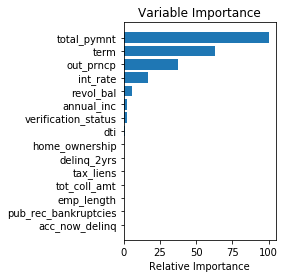

In [182]:
feature_importance = boosting_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

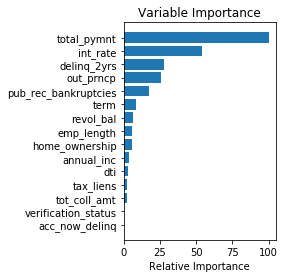

In [183]:
feature_importance = boosting_model_sm.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:

# Initialize and fit the model.
boosting_model_sm_rand = ensemble.GradientBoostingClassifier(**random_grid)
boosting_model_sm_rand.fit(X_train_sm, y_train_sm)


In [ ]:
#### get rid of Knn,linear and SVM
#### review the features
#### 

# Summary

We need to take care of categorical variables and make them numeric. The easy way to do this is to use category. 

Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.

In [ ]:
### test for normality

jb_stats = jarque_bera(df_lifeExpectancy3)
norm_stats = normaltest(df_lifeExpectancy3)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


In [ ]:
### taking a few features and testing
jb_stats = jarque_bera(df_lifeExpectancy3.schooling)
norm_stats = normaltest(df_lifeExpectancy3.schooling)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_lifeExpectancy3.thinness_5_9_years)
norm_stats = normaltest(df_lifeExpectancy3.thinness_5_9_years)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_lifeExpectancy3.total_expenditure)
norm_stats = normaltest(df_lifeExpectancy3.total_expenditure)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

### looks like these don't look normal